### Cargar el training dataset

In [36]:
import pandas as pd

train = pd.read_csv('training.csv')


### Haz el procesamiento de tu train dataset

- Eliminar duplicados
- Vamos a utilizar solo los siguientes features: Sex, Age, pClass, Fare, SibSp y Parch (6 en total)
- Separa X y Y

In [37]:
y_train = train['Survived']
X_train = train[['Sex', 'Age', 'Pclass', 'Fare','SibSp', 'Parch']]

In [38]:
X_train.loc[:,'Sex'] = X_train['Sex'].map({'female': 0, 'male': 1})

mean = X_train['Age'].mean()
X_train.loc[:, 'Age'] = X_train['Age'].fillna(mean)


In [39]:
X_train

,Sex,Age,Pclass,Fare,SibSp,Parch
0,0,2.000000,3,10.4625,0,1
1,1,29.334649,3,15.5000,0,0
2,0,39.000000,1,83.1583,1,1
3,1,74.000000,3,7.7750,0,0
4,1,29.334649,3,7.2250,0,0
...,...,...,...,...,...,...
707,1,32.000000,3,7.9250,0,0
708,0,29.334649,3,7.6292,0,0
709,0,30.000000,1,106.4250,0,0
710,1,29.334649,3,7.7500,0,0


### Construye un DecisionTreeClassifier

- Utiliza la librería scikit-learn
- Entrena a tu clasifier utilizando X y y

In [40]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

### Visualiza el arbol

- Utiliza figsize=(60,40)
- Utiliza un fontsize de 6
- Puedes usar la función plot_tree de scikit-learn para visualizar el árbol de decisiones.
- Descarga la imagen y observa como se han formado las ramas (branches)

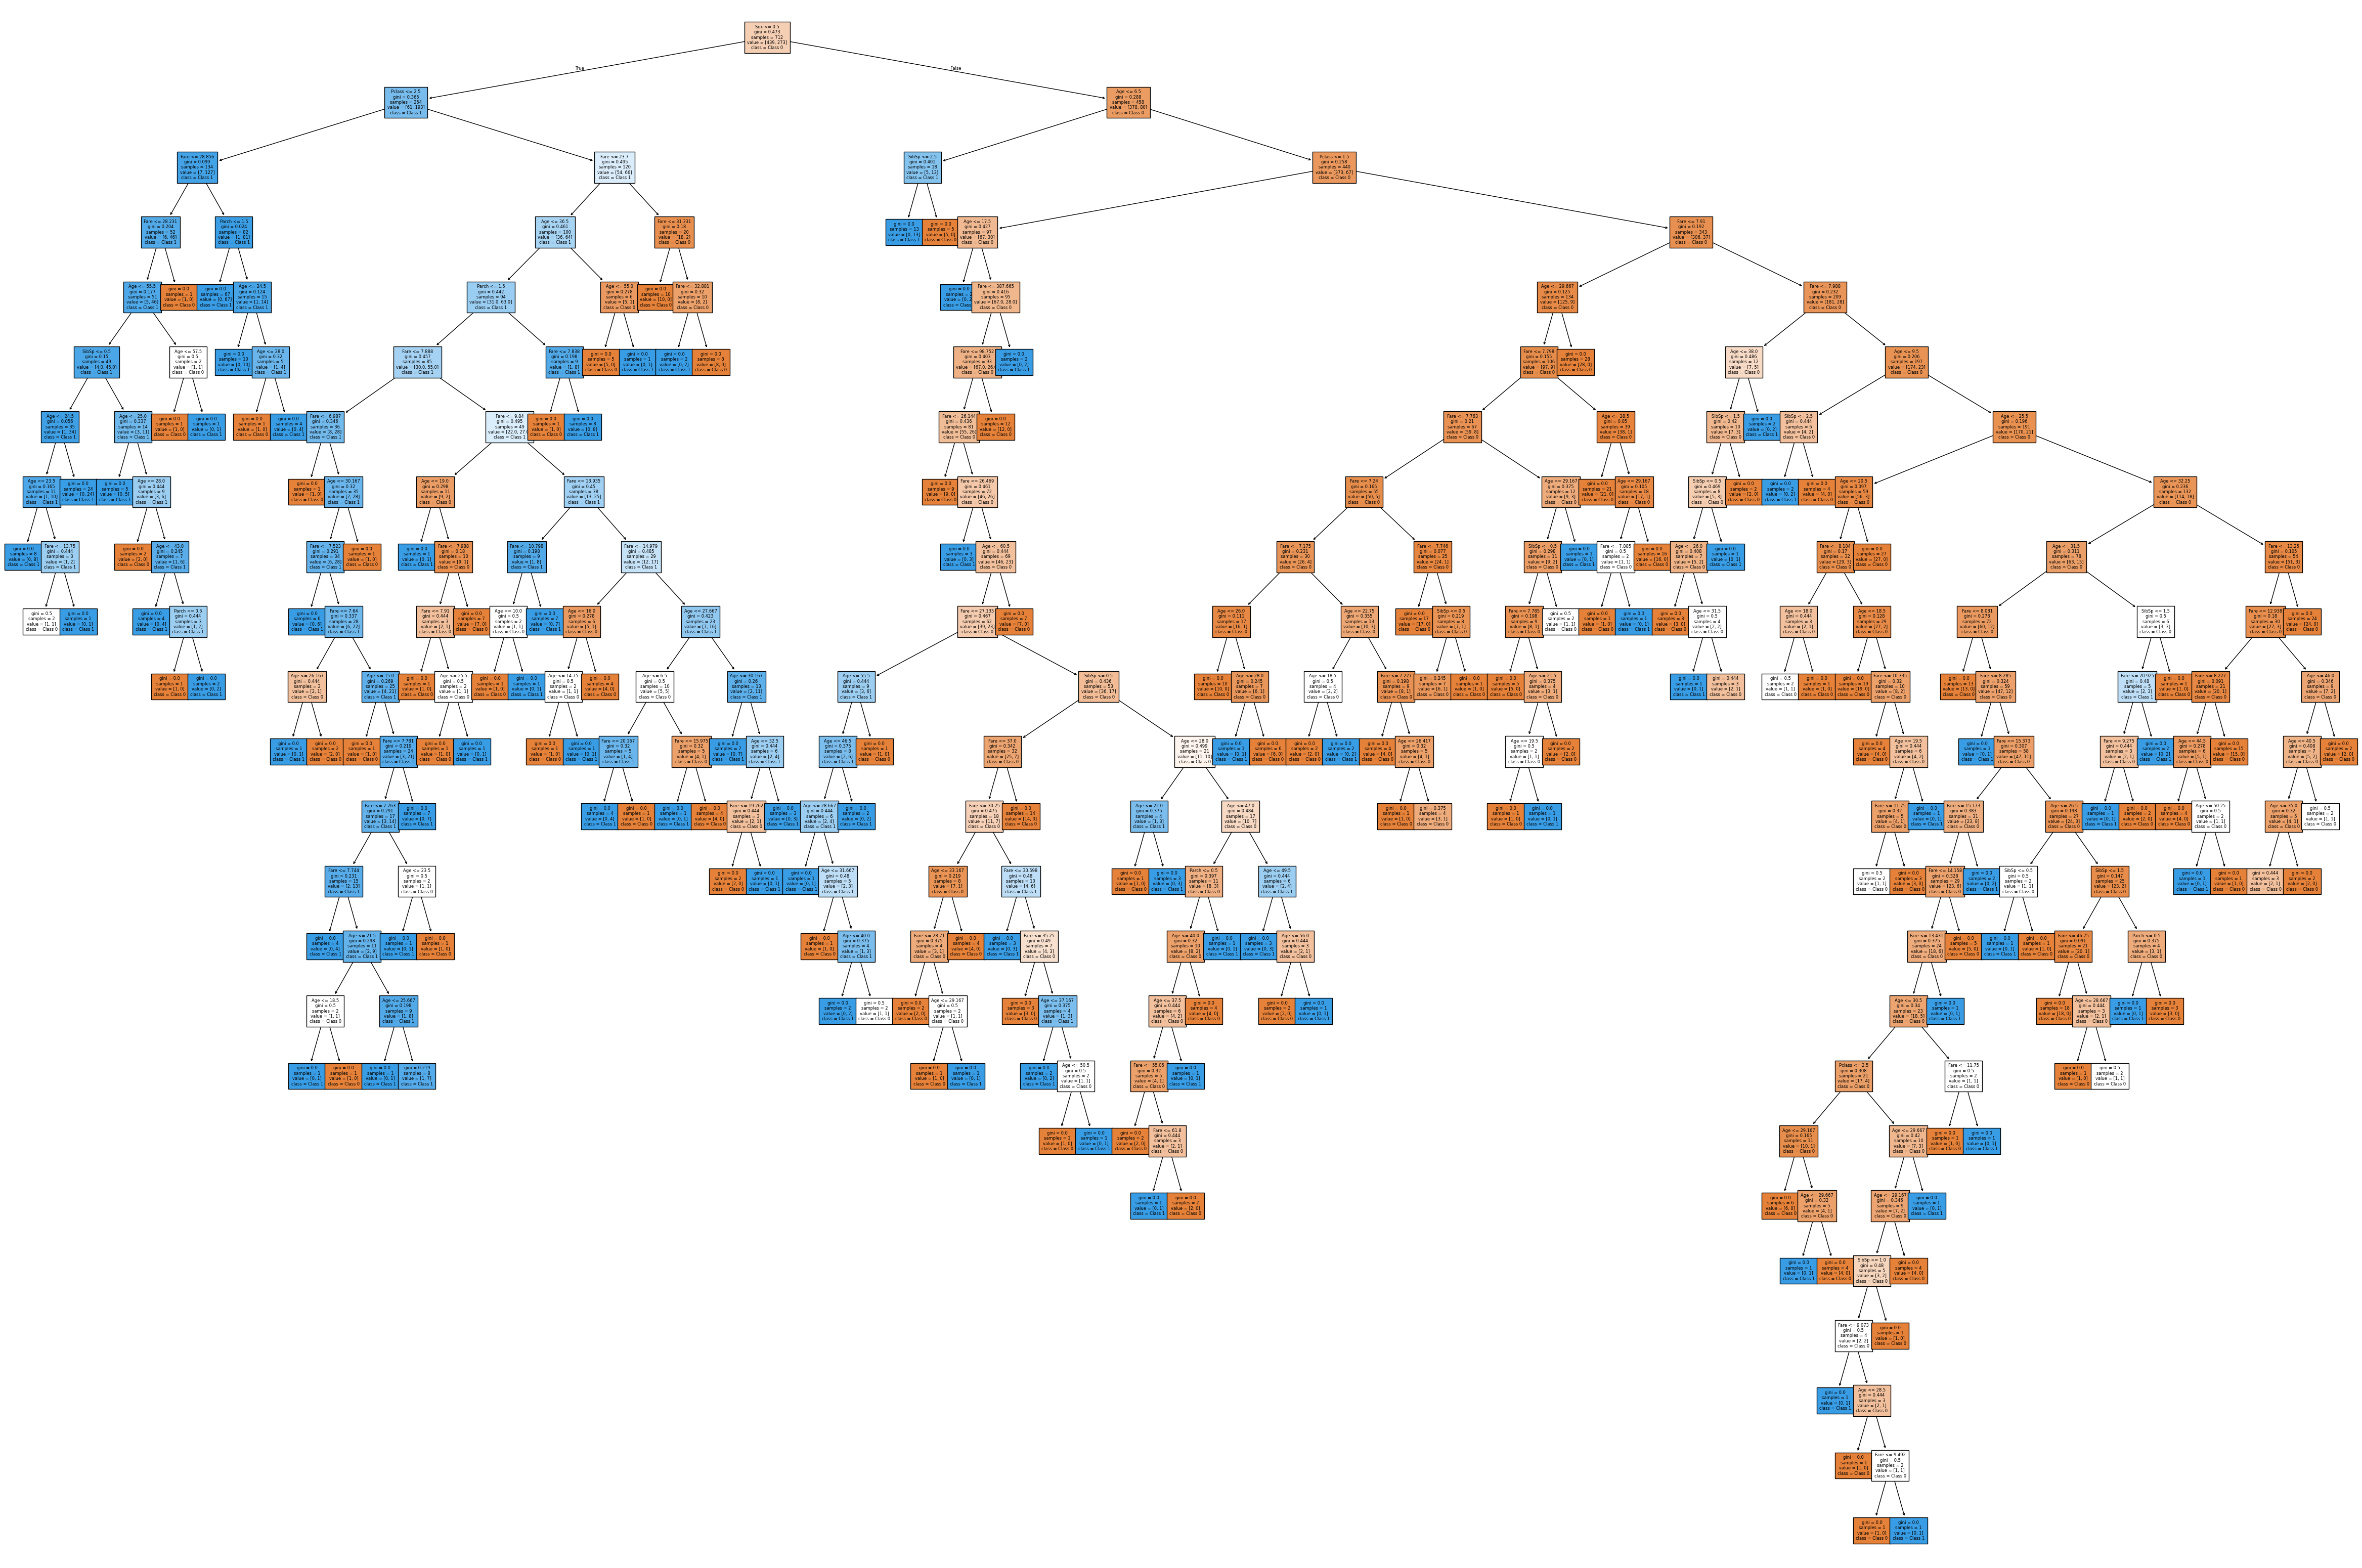

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(60,40))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], fontsize=6)
plt.show()

### Carga el testing dataset

- Haz los mismo pasos que hiciste para el training dataset:
    - Preprocesar los datos
    - Utilizar solo los 6 features mencionados
    - Separar X y Y

In [57]:
testing = pd.read_csv('testing.csv')

y_test = testing['Survived']
X_test = testing[['Sex', 'Age', 'Pclass', 'Fare','SibSp', 'Parch']]

X_test.loc[:,'Sex'] = X_test['Sex'].map({'female': 0, 'male': 1})

X_test.loc[:, 'Age'] = X_test['Age'].fillna(mean)


### Calcula la exactitud (accuracy) de tu modelo

- También grafica una matriz de confusión y evalua los resultados.

Accuracy:  0.7597765363128491


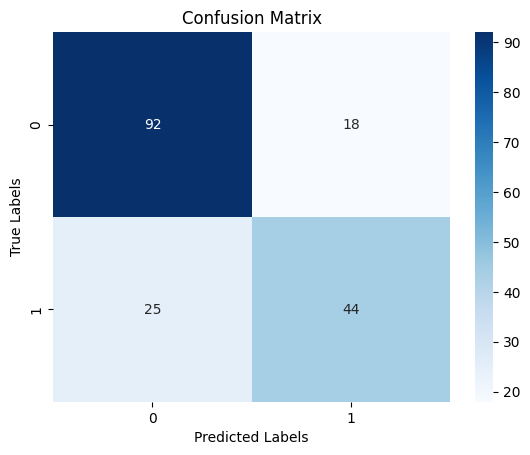

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)


print('Accuracy: ', accuracy_score(y_test, y_pred))


# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Incluir etiquetas en los ejes
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Incluir título
ax.set_title('Confusion Matrix')

# Mostrar el gráfico
plt.show()

### ¿Puedes mejorar la exactitud del modelo?

- Puedes incluir más columnas en tu dataset
- Puedes hacer otro tipo de preprocesamiento
- Puedes modificar los hiperparametros de tu DecisionTreeClassifier
    - max_depth
    - min_samples_split
